In [1]:
import matplotlib
import sys
import numpy as np
sys.path.append("../lib")
import em1d as zpic
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (12, 8)


In [2]:
v_the = 0.03
electrons = zpic.Species( "electrons", -1.0, ppc = 64, uth=[v_the,v_the,v_the])
sim = zpic.Simulation( nx = 500, box = 50.0, dt = 0.0999/2, species = electrons )

In [3]:
niter = 2000

Ex_t = np.zeros((niter,sim.nx))
Ez_t = np.zeros((niter,sim.nx))

tmax = niter * sim.dt

print(f"Running simulation up to t = {tmax:g} ...")
while sim.t <= tmax:
    print(f'n = {sim.n}, t = {sim.t:.2f}', end = '\r')
    Ex_t[sim.n,:] = sim.emf.Ex
    Ez_t[sim.n,:] = sim.emf.Ez
    sim.iter()

print("\nDone.")

Running simulation up to t = 99.9 ...
n = 1999, t = 99.85
Done.


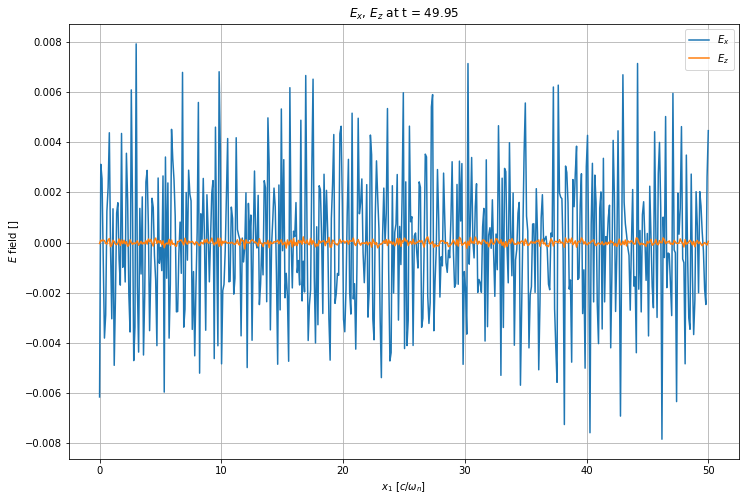

In [4]:
iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

In [15]:
t = np.arange(0, niter * sim.dt, sim.dt)
t.shape

(2000,)

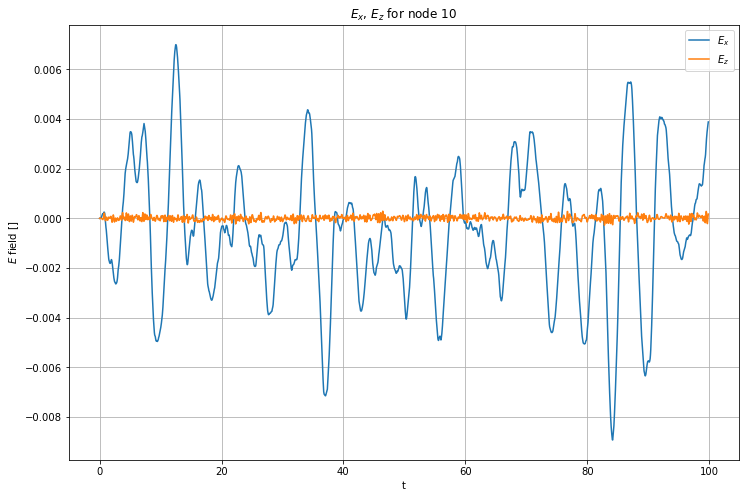

In [19]:
node = 10
Ex_node = Ex_t[:,node]
Ez_node = Ez_t[:,node]
plt.plot(t,Ex_node, label = "$E_x$")
plt.plot(t,Ez_node, label = "$E_z$")
plt.grid(True)

plt.xlabel("t")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node}")
plt.legend()
plt.show()

In [23]:
Ez_node_fft = np.abs(np.fft.fft(Ez_node))
Ex_node_fft = np.abs(np.fft.fft(Ex_node))

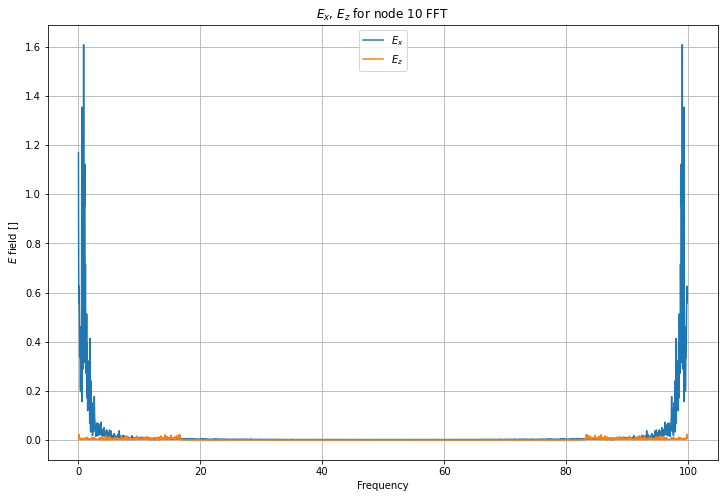

In [24]:
plt.plot(t,Ex_node_fft, label = "$E_x$")
plt.plot(t,Ez_node_fft, label = "$E_z$")
plt.grid(True)

plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT")
plt.legend()
plt.show()

In [26]:
Ez_node_fft = np.fft.fftshift(Ez_node_fft)
Ex_node_fft = np.fft.fftshift(Ex_node_fft)

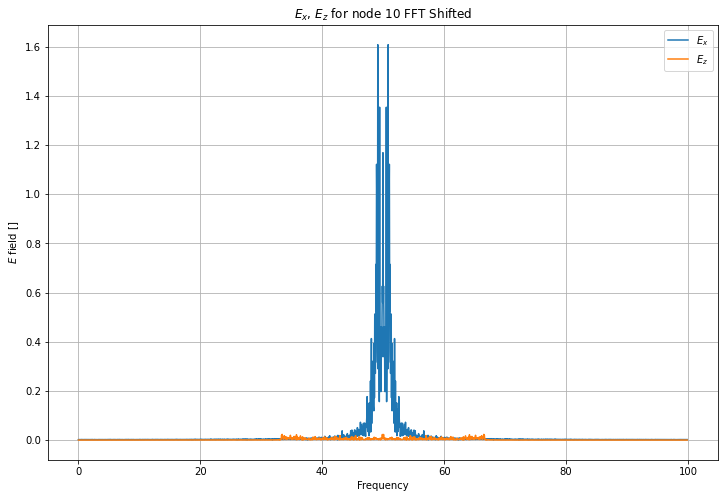

In [27]:
plt.plot(t,Ex_node_fft, label = "$E_x$")
plt.plot(t,Ez_node_fft, label = "$E_z$")
plt.grid(True)

plt.xlabel("Frequency")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ for node {node} FFT Shifted")
plt.legend()
plt.show()